In [1]:
# import
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# read files
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"

fdf = pd.read_csv(features_path)
fdf[fdf.columns[3:]] = fdf[fdf.columns[3:]].apply(pd.to_numeric, errors='coerce')
ddf = pd.read_csv(os.path.join(data_path, "mtnf_integrated.csv"))

In [11]:
fdfg = fdf.filter(regex = 'cow|_len|eu|gd').groupby("cow").median().reset_index()

In [26]:
df = fdfg.merge(ddf, on = ["cow"], how = "left")
df["tnf_cow"] = [1 if df.iloc[i].dtnf_udder_dim_cl > 10 else 0 for i in range(len(df.cow))]
df["tnf_back"] = [1 if (df.iloc[i].dtnf_lb_dim_cl > 5) |  (df.iloc[i].dtnf_rb_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["tnf_front"] = [1 if (df.iloc[i].dtnf_lf_dim_cl > 5) |  (df.iloc[i].dtnf_rf_dim_cl > 5) else 0 for i in range(len(df.cow))]

for i in range(len(df.cow)):
    # print(df.iloc[i].dko_rf_dim_cl)
    if (df.iloc[i].dtnf_lf_dim_cl > 5):
        df.loc[i,"kolf"] = 'a' 
    if (df.iloc[i].dtnf_rf_dim_cl > 5):
        df.loc[i, "korf"] = 'a'
    if (df.iloc[i].dtnf_rb_dim_cl > 5):
        df.loc[i,"korb"] = 'a'
    if (df.iloc[i].dtnf_lb_dim_cl > 5):
        df.loc[i, "kolb"] = 'a'

<Axes: xlabel='tnf_front', ylabel='front_eu'>

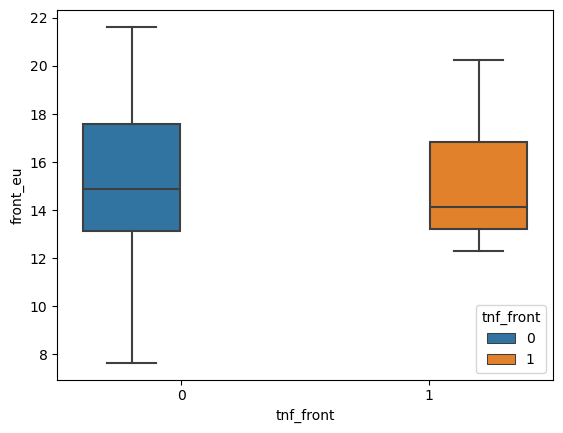

In [27]:
sns.boxplot(data=df, y="front_eu", x = "tnf_front", hue = "tnf_front")

<Axes: xlabel='tnf_back', ylabel='back_eu'>

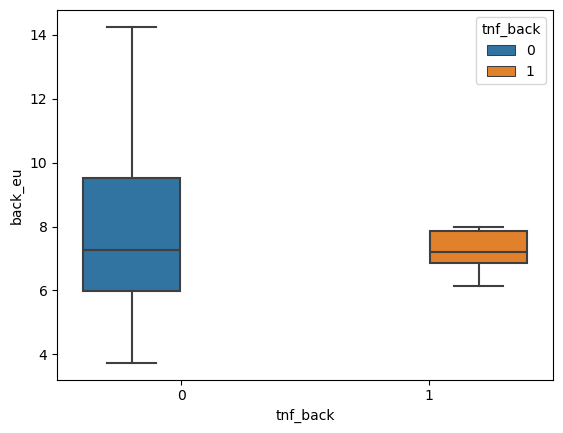

In [28]:
sns.boxplot(data=df, y="back_eu", x = "tnf_back", hue = "tnf_back")

In [33]:
mdf = pd.melt(df, value_vars = ['rf_len', 'rb_len', 'lb_len', 'lf_len'], id_vars =['cow', "tnf_cow", "kolf", "korf", "korb", "kolb"])

In [62]:
mdfg = mdf[["cow", "tnf_cow", "value"]].groupby(["cow", "tnf_cow"]).agg(["min", "max"]).reset_index()
mdfg.columns = [col[1] if len(col[1])>0 else col[0] for col in mdfg.columns]

In [64]:
mdfg["diff"] = mdfg["max"] -mdfg["min"]

In [66]:
mdfg

,cow,tnf_cow,min,max,diff
0,627,0,36.358942,42.078602,5.719660
1,723,0,32.716431,47.956094,15.239662
2,729,0,37.343963,60.757677,23.413714
3,736,0,49.515135,51.872415,2.357280
4,764,0,37.066922,44.013406,6.946484
...,...,...,...,...,...
133,1486,0,23.264238,37.961439,14.697201
134,1487,0,26.069107,51.276823,25.207716
135,1495,0,27.101730,44.635441,17.533710
136,1501,0,35.086378,47.620275,12.533897


<Axes: xlabel='tnf_cow', ylabel='diff'>

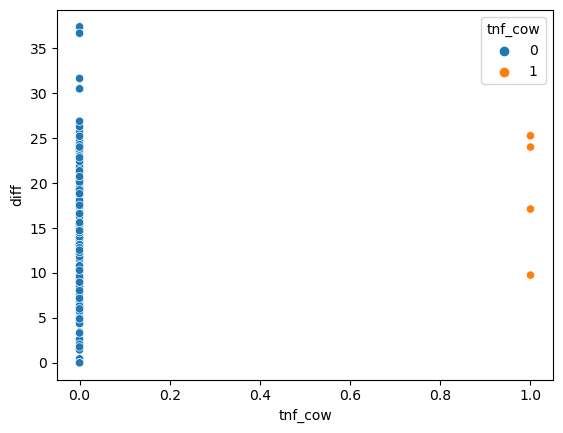

In [67]:
sns.scatterplot(data=mdfg, y="diff", x = "tnf_cow", hue = "tnf_cow")

,cow,tnf_cow,kolf,korf,korb,kolb,variable,value
0,627,0,n,n,n,n,rf_len,41.337529
1,723,0,n,n,n,n,rf_len,47.956094
2,729,0,n,n,n,n,rf_len,60.757677
3,736,0,n,n,n,n,rf_len,NaN
4,764,0,n,n,n,n,rf_len,44.013406
...,...,...,...,...,...,...,...,...
547,1486,0,n,n,n,n,lf_len,37.961439
548,1487,0,n,n,n,n,lf_len,42.302186
549,1495,0,n,n,n,n,lf_len,31.150010
550,1501,0,n,n,n,n,lf_len,47.620275


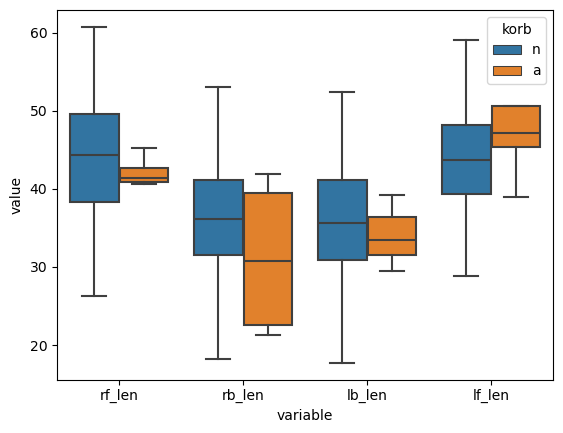

In [32]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "korb")
mdf